# Qiskit Fall Fest at Korea University 2023

![QFF Logo](images/QFF-logo.png)

## Challenge 4: The Quantum Enigmas

<center>
<img src="images/qe-logo.png" width="50%">
</center>

이번 챌린지는 Institut Quantique at Sherbrooke University에서 만든 Quantum Enigmas YouTube series를 기반으로 구성되었습니다. **Quantum Enigmas series의 영상인 [001 video](https://www.youtube.com/watch?v=c1beJIg8lRs)을 보시길 바랍니다.** 이번 챌린지는 이 영상을 보지 않으면 내용을 이해하는데 혼돈이 생길 수 있습니다.

**Click here to watch ---> [Quantum Enigmas Episode 001](https://www.youtube.com/watch?v=c1beJIg8lRs)**

영상을 보신 이후에 Part1을 시작하시길 바랍니다!

## Part 1: Starting the Circuit

영상의 핵심을 짚겠습니다. 여러분은 두개의 문 중에 하나를 고르셔야 합니다. 둘 중 하나의 문뒤에는 보물이 있습니다. 각각의 문에는 수호자(Guardian)가 있습니다. 수호자 중에 한 명은 진실만을 말하고, 다른 한 명은 거짓만을 말합니다. 여러분은 오직 한 명의 수호자에게 질문을 하고 어떤 문이 정답인지(어떤 문 뒤에 보물이 있는지)를 알아내야 합니다.

이 영상에서는 두 수호자 수수께끼를 어떻게 양자회로를 통해 표현할 수 있는지 다루었습니다. Qiskit을 사용하여 그 양자회로를 구현하고 수수께끼를 풀어봅시다.

영상에서 본 것과 같이 3개의 qubits가 필요하며, 첫번째 qubit은 오른쪽 문 옆에 있는 첫번째 수호자를 표현한 것이고, 두번째 qubit은 왼쪽 문 옆에 있는 두번째 수호자를 표현하였으며, 세번째 qubit은 누가 거짓을 말하는 것인지를 나타내는 qubit입니다. 오른쪽 문 수호자와 왼쪽 문 수호자 중 누가 거짓을 말하는지 모르기 때문에 이를 세번째 qubit을 중첩상태로 만들어 측정 전까지는 누가 거짓을 말하는지 보장할 수 없도록 하였습니다.

시작할 때 (Hadamard gate를 이용하여)첫번째 수호자를 중첩상태로 만들고, (CNOT gate)를 이용하여 두 수호자를 얽힘 상태로 만들어 줍니다. 앞에서 말했듯이 세번째 qubit은 중첩상태로 만들어줍니다. 우리의 회로는 다음과 같이 생길 것입니다.

<center>
<img src="images/enigmas-circuit-1.png" width="25%">
</center>

아래에 있는 코드 셀에서 3개의 qubits와 3개의 classical bits를 가진 양자회로를 만들어 놓았습니다. 거기서부터 회로를 만들어 나가시면 됩니다!

### 문제 1

아래의 코드 셀에서, qubit 0에 H gate를 가하고, qubit 2에 H gate를 가하시길 바랍니다. 그리고 qubit 0을 control qubit, qubit 1을 target qubit으로 하는 CNOT gate를 가해주세요.

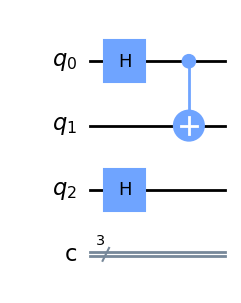

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)


## Write your code below this line ##

qc.h(0)
qc.h(2)
qc.cx(0,1)

## Do not change the code below here ##

answer1 = qc
qc.draw('mpl')

In [2]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer1.qasm(), "Challenge4a")

ModuleNotFoundError: No module named 'qc_grader'

수고하셨습니다!

현재 최종적으로 만들어야 하는 회로의 일부분을 만들어 나가고 있습니다. 계속해서 만들어봅시다. 현재 수호자에 해당하는 qubit들의 초기상태를 만들었습니다. 두 qubits의 상태는 아래와 같습니다.

$$\frac{1}{2}(|0\rangle_{right}|0\rangle_{left} + |1\rangle_{right}|1\rangle_{left})$$

아직 누가 거짓말을 하는지 결정하는 세번째 qubit과 첫번째 두번째 qubit 간의 상호작용이 없기 때문에 현재 두 수호자 모두 진실을 얘기하고 있는 상태로, 어느 문 뒤에 보물이 있는지 물어본다면 두 수호자의 대답은 항상 같아야 합니다. 위의 문제 1에서 만든 회로에서는 이것을 양자 얽힘으로 표현한 것입니다.

위의 양자 상태는 관측하면 1/2의 확률로 두 수호자 모두 $|0\rangle$ 상태(오른쪽 문이 보물이 있는 문이라고 가리키는 상태)이거나, 1/2의 확률로 두 수호자 모두 $|1\rangle$ 상태(왼쪽 문이 보물이 있는 문이라고 가리키는 상태)입니다.

세번째 qubit인 거짓말 qubit는 측정시 누가 거짓말을 하고 있는 건지 알려줍니다. 세번째 qubit이 $|0\rangle$으로 측정되면 **오른쪽** 수호자가 거짓말을 하고 있다는 것이고, 세번째 qubit이 $|1\rangle$으로 측정되면 **왼쪽** 수호자가 거짓말을 하고 있는 것입니다. 하지만 세번째 qubit은 $|0\rangle$와 $|1\rangle$의 중첩 상태이기 때문에, 마지막에 측정하기 전까지 누가 거짓말을 하는 수호자인지 모릅니다.

이제 세번째 qubit에 따라 한 수호자가 거짓말을 말하도록 회로를 작성합시다.

![Circuit 2](images/enigmas-circuit-2.png)

### 문제 2

현재 회로의 두번째 부분을 만들고자 합니다. 위 그림의 수직 점선(Qiskit에서는 barrier라고 부릅니다)의 오른쪽 부분을 만들면 됩니다. **여러분은 회로의 첫번째 부분을 다시 만드실 필요 없습니다. barrier의 오른쪽 부분만 아래의 코드 셀에서 만들어주세요**

회로에 CNOT gate를 가할 때 순서에 주의해주세요!

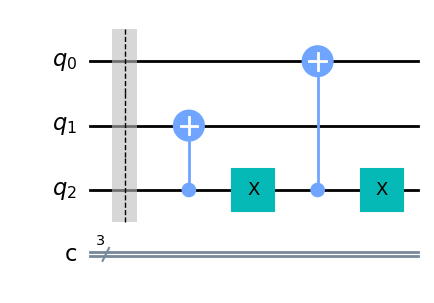

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)

qc.barrier(0, 1, 2)


## Write your code below this line ## 

qc.cx(2,1)
qc.x(2)
qc.cx(2,0)
qc.x(2)


## Do not change the code below this line ##


answer2 = qc
qc.draw('mpl')

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer2.qasm(), "Challenge4b")

## Part 2: The Truth Table

어떠한 것을 양자 회로로 인코딩할 때 현재 본인이 무엇을 만들고 있는지 놓치기 쉽습니다. 각 qubit 자체가 어떤 것을 의미하는 것인지 헷갈릴 수 있고, 어떤 qubit이 $|0\rangle$ 라는 것이 어떤 의미를 표현하는 것인지 헷갈리기 정말 쉽습니다.

이렇게 헷갈리는 것을 막기 위해서는 계속 의미들을 리마인드 하고 truth table을 그려보는 것이 좋습니다. 현재 수수께끼를 양자 회로로 표현해나가고 있는데, 이 쯤에서 truth table을 만들어 보겠습니다. 이 표는 각 셀을 0과 1로 채우고 부가설명까지 적어 놓으면 좋습니다.

먼저 지금까지 언급한 사실들에 대해 살펴보겠습니다.
- 두 명의 수호자가 있고, `q[0]`는 오른쪽 수호자를 의미하며, `q[1]`은 왼쪽 수호자를 의미합니다.
- 수호자 qubit이 $|0\rangle$ 상태로 관측이 된다면, 해당 수호자는 오른쪽 문을 가리키는 것입니다.
- 수호자 qubit이 $|1\rangle$ 상태로 관측이 된다면, 해당 수호자는 왼쪽 문을 가리키는 것입니다.
- 세번째 qubit인 `q[2]`도 있는데, 이것은 거짓말 qubit이라고 부릅니다.
- 거짓말 qubit이 $|0\rangle$ 상태로 관측이 된다면, 오른쪽 수호자가 거짓말을 하고 있다는 뜻입니다.
- 거짓말 qubit이 $|1\rangle$ 상태로 관측이 된다면, 왼쪽 수호자가 거짓말을 하고 있다는 뜻입니다.

현재 여러분은 양자 회로를 절반 정도 만드셨습니다. 지금 우리의 목표는 "어느 문 뒤에 보물이 있을까?"에 대해 답하는 것입니다. 지금까지 여러분이 만드신 절반의 회로는 단지 어느 문이 진짜인지, 누가 거짓말을 하는 것인지 표현한 것입니다. 후반부 회로에서는 수호자에게 올바른 질문을 던지는 과정이 될 것입니다.

지금까지 만든 회로는 측정될 수 있는 상태들의 경우의 수가 4가지 입니다. 이제 진짜 현재까지 만든 양자 회로의 truth table을 만들겠습니다. 아래 표의 순서에 주의해서 봐주세요. `q[2]`를 가장 왼쪽에 쓰고, `q[0]`를 가장 오른쪽에 쓸 것입니다.

| q[2] | q[1] | q[0] |
|:---:|:---:|:---:|
| 0 | 0 | 1 | 
| 1 | 1 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 1 |

#### "이거 너무 헷갈립니다!!"

### Truth table에 Qubit에 대한 설명을 간단히 쓰기

잠시 다른 이야기를 하겠습니다.

"위의 표에서 왜 가장 첫번째 qubit을 표의 오른편에 썼을까?"라는 의문이 드셨나요?

좋은 질문입니다! Qiskit에서는 little-endian 표기를 사용합니다. Little-endian 표기법은 MSB(most significant bit)를 왼쪽에 쓰고, LSB(least significant bit)를 오른쪽에 쓰는 방법입니다. 방금 서술한 말이 잘 이해가 안 되신다면 Qiskit은 qubit 결과를 이진수로 표현할 때 가장 오른쪽에 첫번째 qubit의 측정 결과를 적고, 가장 왼쪽에 마지막 qubit의 측정 결과를 적기로 약속했다는 사실만 아시면 됩니다.

사실 첫번째 qubit을 오른쪽 문을 지키는 수호자를 의미하도록 설정한 것도 little-endian 표기를 했을 때 더 시각적으로 받아들이기 편하도록 하기 위함입니다. Little-endian 표기를 하면 오른쪽 수호자를 의미하는 첫번째 qubit가 가장 오른쪽에 표기되기 때문입니다.

다시 원래 이야기로 돌아와서, 위의 표를 조금더 알아보기 편하게 작성해봅시다. 표를 작성할 때 qubit는 little-endian 표기법을 통해 표현한다는 것은 알았으니, 이제 표의 1행에 는 각 qubit이 몇번째 qubit인지 표현할 필요가 없습니다. qubit의 순서 대신, qubit에 대한 정보를 적겠습니다. 그리고 각 상황에 대한 id를 추가하겠습니다.
다시 한 번 말씀드리지만, 0은 오른쪽을 의미하고 1은 왼쪽을 의미합니다.

| Who is Lying? | Guard on left says | Guard on right says | ID |
|:---:|:---:|:---:|:---:|
| 0 | 0 | 1 | A |
| 1 | 1 | 0 | B |
| 0 | 1 | 0 | C |
| 1 | 0 | 1 | D |

설명:
- A: 오른쪽에 있는 수호자가 거짓말을 하고 있으며, 보물은 오른쪽에 있습니다.
- B: 왼쪽에 있는 수호자가 거짓말을 하고 있으며, 보물은 오른쪽에 있습니다.
- C: 오른쪽에 있는 수호자가 거짓말을 하고 있으며, 보물은 왼쪽에 있습니다.
- D: 왼쪽에 있는 수호자가 거짓말을 하고 있으며, 보물은 왼쪽에 있습니다.

ID가 A인 상황에 대해서 자세히 살펴보겠습니다.

| Who is Lying? | Guard on left says | Guard on right says |
|:---:|:---:|:---:|
| 0 | 0 | 1 | 

오른쪽 수호자는 보물이 왼쪽 문 뒤에 있다고 합니다(`q[0] = 1`). 왼쪽 수호자는 보물이 오른쪽 문 뒤에 있다고 합니다(`q[1] = 0`). 하지만 오른쪽 수호자는 거짓말을 하고 있습니다(`q[2] = 0`). 따라서 뒤에 보물이 있는 문은 오른쪽 문이라는 것을 알 수 있습니다.

### 문제 3

이제 여러분이 위의 truth table을 이해하셨는지 체크해보겠습니다. 위의 truth table 기준으로 아래의 코드 셀에 있는 주석들을 보고 퀴즈를 풀어주시면 됩니다.

In [4]:
answer3: bool

## Quiz: evaluate the results and decide if the following statement is True or False

q0 = 1
q1 = 0
q2 = 1

## Based on this, is it TRUE or FALSE that the Guard on the left is a liar? 
## Assign your answer, either True or False, to answer3 below

answer3 = True

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer3, "Challenge4c")

### 문제 4

또 다른 퀴즈입니다!

In [5]:
## Quiz: Fill in the correct numbers to make the following statement true: 
## The treasure is on the right, and the Guard on the left is the liar

q0 = 0
q1 = 1
q2 = 1

## HINT - Remember that Qiskit uses little-endian ordering

answer4 = [q0, q1, q2]

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer4, "Challenge4d")

## Part 3: Finishing the Circuit

영상에서 수호자에게 어떤 질문을 해야하는지 나왔던 것 기억하시나요? 어떠한 수호자에게 "다른 수호자는 나에게 어떤걸 **열지 말라고** 할 것인가?" 라고 물어보면 된다고 하였습니다. 이 질문을 진실을 말하는 수호자이든, 거짓을 말하는 수호자이든 상관없이 누구에게나 물어봐도 정답을 알려줄 것입니다.

그러나, 현재 여러분의 양자 회로는 이 내용들을 포함하고 있지 않습니다. 위 내용을 포함시키기 위해서는 새로운 gate인 **Swap gate**를 도입해야 합니다. 이것은 매우 간단한 gate 입니다. Swap gate는 두 개의 qubit의 양자 상태를 서로 바꾸어(swap) 줍니다. 이 gate를 양자 회로에 적용하기 위해서는 `.swap(qubit1, qubit2)` 매서드를 사용하시면 됩니다.

Swap gate는 CNOT gate와 비슷해보이지만, 각 qubit 줄에 원형으로 표시하는 것이 아니라 두개의 X 표시를 보실 수 있습니다. 이 gate가 여러분이 만들어야 하는 회로의 마지막 파트의 첫번째 gate가 될 것입니다.

![Circuit 3](images/enigmas-circuit-3.png)

### 문제 5

위 그림에 여러분이 만들어야 하는 모든 gate들이 전부 나와 있습니다. 아래의 코드 셀에서는 회로에 적용해야하는 gate들 중 일부만 적어놓았습니다. 빠진 gate들을 아래의 코드 셀에서 채워 넣으시길 바라고, 여러분이 만든 회로의 그림과 위의 그림이 일치하는지 확인하시길 바랍니다.

**주의:** barrier를 제거하지 마시길 바랍니다.

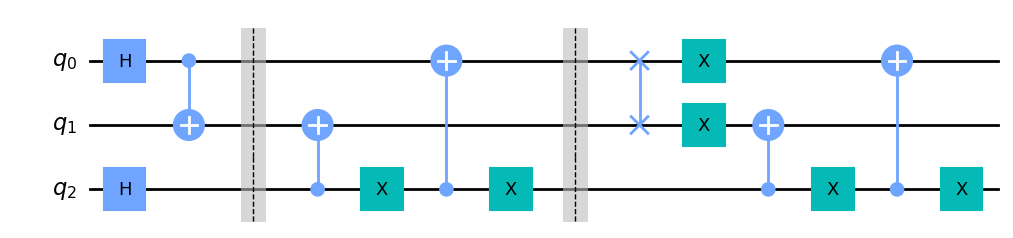

In [6]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)


## in the code below, fill in the missing gates. Run the cell to see a drawing of the current circuit ##


qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.barrier(0, 1, 2)

qc.cx(2,1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)
qc.barrier(0, 1, 2)

qc.swap(0,1)
qc.x(0)
qc.x(1)
qc.cx(2, 1)
qc.x(2)
qc.cx(2,0)
qc.x(2)


## Do not change any of the code below this line ##


answer5 = qc
qc.draw(output="mpl")

In [ ]:
# Grader Cell: Run this to submit your answer

from qc_grader import grade

grade(answer5.qasm(), "Challenge4e")

## Part 4: The Final Truth Table and Getting Results

이제 여러분은 완성된 양자회로를 갖고 있습니다. 축하드립니다! 이 회로를 실행시키기 전에 완성된 회로에서의 truth table을 다시 한 번 보겠습니다.

영상에서 나왔듯이 여러분이 수호자에게 해야하는 질문은
**"which door would the other Guardian tell me not to open?"** 입니다.

완성된 회로의 truth table을 보며 이것이 어떻게 진행되었는지 살펴봅시다.

| Who is Lying? | Guard on left says | Guard on right says | 
|:---:|:---:|:---:|
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 0 | 
| 1 | 1 | 1 | 

Part 2에서 봤던 truth table과의 차이점을 바로 보실 수 있을 것입니다. Part 2에서는 두 수호자가 항상 서로 다른 문을 가리켰습니다. 하지만 이제는 두 수호자가 같은 답을 가리킵니다! 이것을 보시면 어떤 수호자에게 질문을 하더라도 상관없이 같은 답을 말해준다는 것을 알 수 있습니다. 이제 보물을 가질 수 있습니다.

이제 여러분의 회로를 실행시키고 그 결과를 관찰해 봅시다. 아래의 코드 셀을 실행시키면 여러분이 만든 양자 회로를 1000번 실행시키게 될 것 입니다. 그 결과가 그래프로 나타날 것입니다.

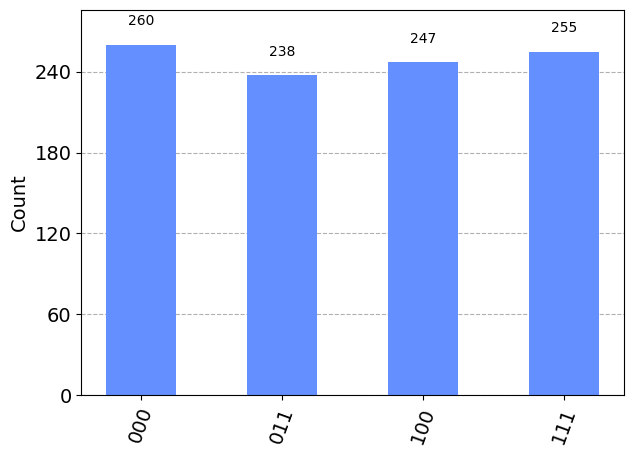

In [7]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram


## This is the full version of the circuit. Run it to see the results ##

quantCirc = answer5

# Execute the circuit and draw the histogram

measured_qc = quantCirc.measure_all(inplace=False)
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(transpile(measured_qc, backend), shots=1000).result()
counts  = result.get_counts(measured_qc)
plot_histogram(counts)


## 보너스 설명 - Primitive and Sampler

이 부분은 여러분의 학습을 위해 제공해드리는 자료이니 지금 보셔도 되고, 나중에 여유되실 때 보셔도 됩니다. 정확한 정보 전달을 위해 영어 그대로 적겠습니다.

#### Qiskit Runtime Primitives: Introducing Sampler

Let's give a more scientifically accurate explanation for why we run our circuits thousands of times. 

With respect to the main point of interest here, the core capability of quantum computers that sets them apart from classical computers is their ability to generate non-classical probability distributions as their outputs. The inherent nature of the highly probabilistic results we get require us to have multiple runs (shots) for the same circuit to generate usable information. That usable information is typically seen in the form of probability distributions. 

When the output we get is a probability distribution, one typical thing we might want to do is to sample from it.

So the main thing we do here is **sample probability distributions.** This brings us to something new: **The Sampler**

#### The Sampler

The Sampler is one of the first Qiskit Runtime **Primitives**. Primitives are core functions that make it easier to build modular algorithms and applications. In the future, we think the vast majority of people using quantum computers will do so using Qiskit Runtime.

The Sampler essentially does what it says in its name. By sampling from its output, it estimates the entire quasi-probability distribution of a given quantum circuit. This is a program that takes a user's circuit as an input and generates an error-mitigated readout of quasiprobabilities. This provides users a way to better evaluate shot results using error mitigation and enables them to more efficiently evaluate the possibility of multiple relevant data points in the context of destructive interference.

This is very similar to the familiar output of "counts" you usually get when you run a circuit. Here, however, you obtain a quasi-probability distribution output as a result of the error mitigation routine involved.

Simply put, you have access to a greater range of information data points that you can use however you like. 

The information obtained from a quasi-probability distribution representation may be of more relevance for investigating likelihoods of true probability distributions and computing unbiased expectation value points in exchange for a sampling overhead. These distributions, broadly speaking, can behave similar to true probability theory in some sense with the difference being that they have a few constraints of the original theory relaxed, one of which is the possiblity of having negative data points representing "negative" probability (but collectively still summing up to 1). These, which should not be mistaken for true probabilities, can be estimated to a nearest true probability distribution up to certain error boundary based on the context of usage. Few example use cases where Sampler could be of interest are: Grovers search, QSVM routines, Stabilizer computation, Optimization routines etc. 

Let's re-run the last exercise by using Sampler by using a same quantum circuit.

In [ ]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_distribution

sampler = Sampler()  


result = sampler.run(measured_qc, shots=1000).result()

probs = result.quasi_dists[0].binary_probabilities()
plot_distribution(probs)

## 축하합니다!

여러분은 네번째 챌린지를 완주하셨습니다. 여기서 배운 내용을 다시 한 번 짚고 넘어가겠습니다.

- Qiskit은 little-endian ordering을 사용한다.
- SWAP gate랑 Barrier는 조금 더 복잡한 양자 회로를 만들 때 사용한다.
- 여기에서 완성한 양자 회로를 실행시켰을 때 각각의 결과가 관측될 확률은 25% 였다. 1000번 회로를 실행시키고 나니, 각 결과가 대략 250번씩 나왔다는 것을 확인할 수 있다. 하지만 정확히 250번은 아닐 수 있다.

시간이 되신다면 Quantum Enigma 영상 시리즈 중에서 2번째 에피소드도 보시고 이를 양자회로로 옮겨보시는 것도 재밌을 것 같습니다. 

정말 수고 많으셨고, 여기까지 해내셨으면 정말 자랑스러워하셔도 됩니다! 하지만 아직 배울 것이 많습니다. 챌린지를 더 즐기시길 바랍니다. 행운을 빌게요!!